In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nasdaqdatalink

1. Using the World Bank Indicators, download data for “GDP per capita (current US$)” and “Malnutrition prevalence, weight for age (% of children under 5).” What kind of relationship do you expect? Make a scatter plot of malnutrition prevalence against GDP per capita (using all available years and countries). What kind of relationship do you see? Make a graph for the geographical regions (six regions excluding North America and use a different color for each). Make a graph for income levels (four income levels and use a different color for each). Carefully label all graphs and provide legends.

In [3]:
gdp_data = pd.read_csv('GDP_Per_Capita.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Metadata_Country_API_GDP_Per_Capita.csv', index_col=0)
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [4]:
ufc_data = pd.read_csv('Underweight_Children_Data.csv', skiprows = 4, index_col=1)
ufc_metadata = pd.read_csv('Metadata_Country_API_Underweight_Children_Data.csv', index_col=0)
ufc_data.drop(ufc_data.filter(regex="Unnamed"),axis=1, inplace=True)
ufc_metadata.drop(ufc_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [5]:
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
ufc_df = pd.merge(ufc_metadata,ufc_data,on='Country Code')

In [6]:
gdp_df_trim = gdp_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
ufc_df_trim = ufc_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [7]:
gdp_melt = gdp_df_trim.melt(ignore_index=False,var_name="Year",value_name="GDP")
ufc_melt = ufc_df_trim.melt(ignore_index=False,var_name="Year",value_name="MalnutritionData")

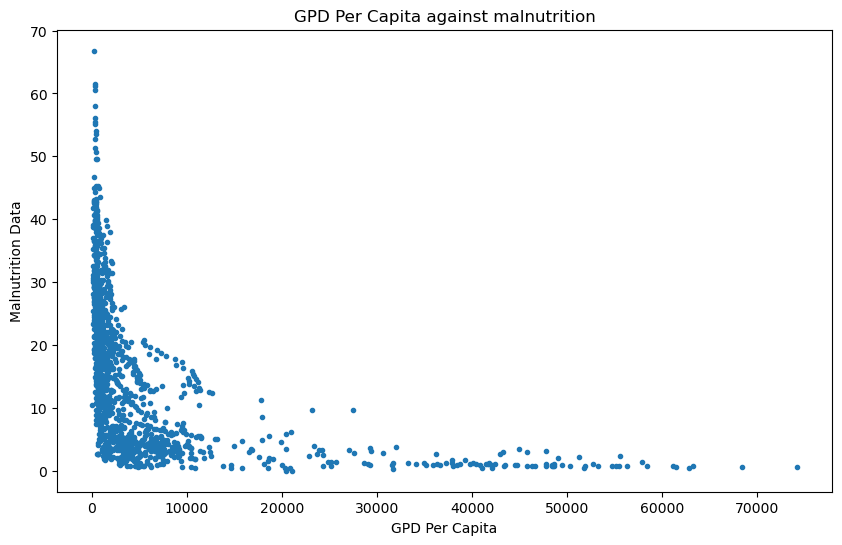

In [9]:
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
plt.scatter(gdp_melt['GDP'],ufc_melt['MalnutritionData'], marker='.')
plt.show()

In [11]:
country_gdp = gdp_df.drop(gdp_df[gdp_df["Region"]=='North America'].index)
country_ufc = ufc_df.drop(ufc_df[ufc_df["Region"]=='North America'].index)

In [12]:
country_gdp_trim = country_gdp.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
country_ufc_trim = country_ufc.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [26]:
country_gdp_trim_melt = country_gdp_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="GDP")
country_ufc_trim_melt = country_ufc_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="MalnutritionData")

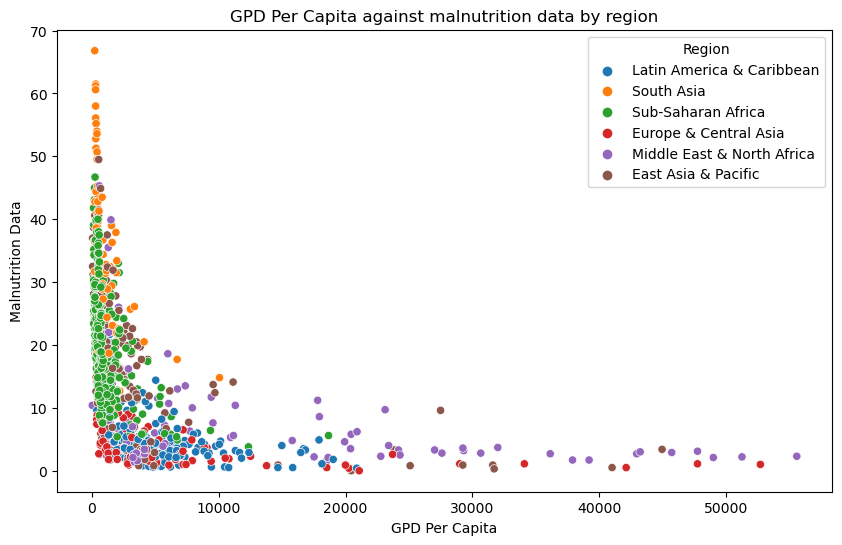

In [14]:
plt.figure(figsize=(10,6))
plt.title("GPD Per Capita against malnutrition data by region")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['Region'])
plt.show()

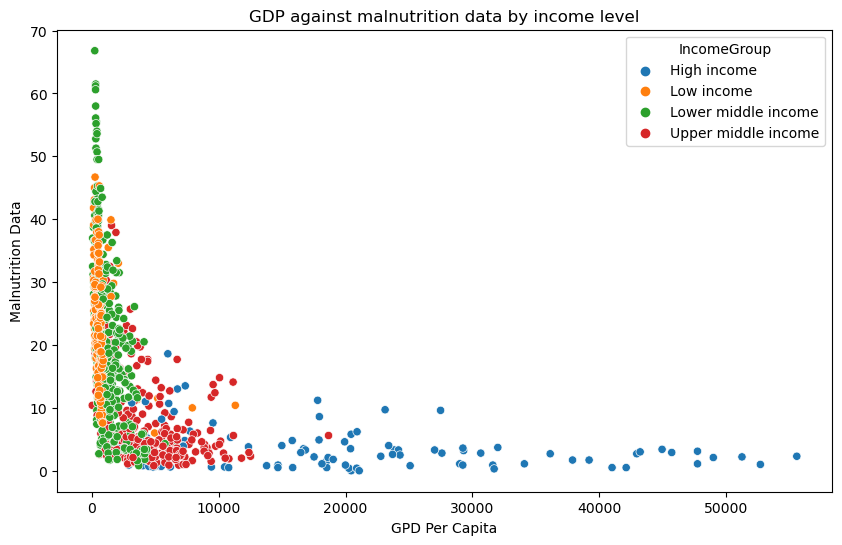

In [15]:
plt.figure(figsize=(10,6))
plt.title("GDP against malnutrition data by income level")
plt.xlabel("GPD Per Capita")
plt.ylabel("Malnutrition Data")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['IncomeGroup'])
plt.show()

2. Using Quandl, download data, synchronize the time stamps and plot time series for the prices of Wheat, Crude Oil and Gold in $ on the
same graph. Indicate the maximum and minimum prices in all three time series using coloured dots. Use a legend to explain each one.

In [616]:
nasdaqdatalink.ApiConfig.api_key = "PQVyzUb4YWx1kUZccLQi"

wheat_data = nasdaqdatalink.get('ODA/PWHEAMT_USD')
oil_data = nasdaqdatalink.get('WGEC/WLD_CRUDE_WTI')
gold_data = nasdaqdatalink.get('BUNDESBANK/BBK01_WT5511')

In [684]:
all_data_rename = pd.merge(pd.merge(oil_data, gold_data,how="inner", on="Date"),wheat_data,how="inner", on="Date")
all
_data = all_data_rename.rename(columns={"Value_x":"OilData","Value_y":"WheatData","Value":"GoldData"})

In [735]:
min_wheat_data = all_data[all_data["WheatData"]==all_data["WheatData"].min()]
min_oil_data = all_data[all_data["OilData"]==all_data["OilData"].min()]
min_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].min()]

In [736]:
max_wheat_data = all_data[all_data["WheatData"]==all_data["WheatData"].max()]
max_oil_data = all_data[all_data["OilData"]==all_data["OilData"].max()]
max_gold_data = all_data[all_data["GoldData"]==all_data["GoldData"].max()]

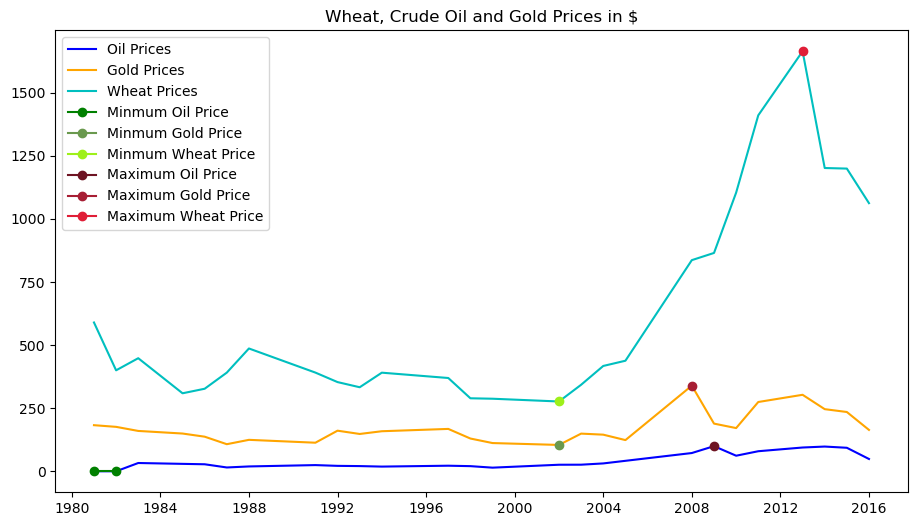

In [764]:
plt.figure(figsize=(11,6))
plt.title("Wheat, Crude Oil and Gold Prices in $")
plt.xlabel = "Year"
plt.ylabel = "Price ($)"
plt.plot(all_data.index, all_data['OilData'], label="Oil Prices", color="blue")
plt.plot(all_data.index, all_data['GoldData'], label="Gold Prices", color="orange")
plt.plot(all_data.index, all_data['WheatData'], label="Wheat Prices", color="c")

plt.plot(min_oil_data["OilData"], label="Minmum Oil Price", marker="o", color="#008000")
plt.plot(min_gold_data["GoldData"], label="Minmum Gold Price", marker="o", color="#6a994e")
plt.plot(min_wheat_data["WheatData"], label="Minmum Wheat Price", marker="o", color="#9ef01a")

plt.plot(max_oil_data["OilData"], label="Maximum Oil Price", marker="o", color="#6e1423")
plt.plot(max_gold_data["GoldData"], label="Maximum Gold Price", marker="o", color="#a71e34")
plt.plot(max_wheat_data["WheatData"], label="Maximum Wheat Price", marker="o", color="#e01e37")

plt.legend()
plt.show()

3. Download “CO2 emissions (metric tons per capita)” data from the World Bank Indicators. Select the emissions for all countries in 2010 and calculate summary statistics. Provide a table giving the mean, median, standard deviation, 5, 25, 75, and 95 percentiles. Repeat the same process for “School enrolment, primary (% net).”

In [842]:
CO2_data = pd.read_csv('CO2_Emissions_Data.csv', skiprows = 4, index_col=1)
CO2_data_filtered = c02_data[["2010"]]

In [853]:
C02_mean = round(c02_data_filtered.mean().values[0],3)
C02_median = round(c02_data_filtered.median().values[0],3)
C02_sd = round(c02_data_filtered.std().values[0],3)
C02_p5 = round(c02_data_filtered.quantile(0.05).values[0],3)
C02_p25 = round(c02_data_filtered.quantile(0.25).values[0],3)
C02_p75 = round(c02_data_filtered.quantile(0.75).values[0],3)
C02_p95 = round(c02_data_filtered.quantile(0.95).values[0],3)

In [854]:
CO2_data_table = {'CO2 Emission Statistics':['Mean','Median','Standard Deviation','5th Percentile','25th Percentile','75th Percentile','95th Percentile'],
              'Value':[C02_mean,C02_median,C02_sd,C02_p5,C02_p25,C02_p75,C02_p95]}
CO2_statistics_df = pd.DataFrame(CO2_data_table)
CO2_statistics_df = CO2_statistics_df.set_index('CO2 Emission Statistics')
CO2_statistics_df

,Value
CO2 Emission Statistics,
Mean,4.305
Median,2.667
Standard Deviation,5.069
5th Percentile,0.115
25th Percentile,0.756
75th Percentile,5.892
95th Percentile,15.172


In [830]:
school_data = pd.read_csv('Primary_School_Data.csv', skiprows = 4, index_col=1)
school_data_filtered = school_data[["2010"]]

In [831]:
school_mean = round(school_data_filtered.mean().values[0],3)
school_median = round(school_data_filtered.median().values[0],3)
school_sd = round(school_data_filtered.std().values[0],3)
school_p5 = round(school_data_filtered.quantile(0.05).values[0],3)
school_p25 = round(school_data_filtered.quantile(0.25).values[0],3)
school_p75 = round(school_data_filtered.quantile(0.75).values[0],3)
school_p95 = round(school_data_filtered.quantile(0.95).values[0],3)

In [838]:
school_data_table = {'School Enrollment Statistics':['Mean','Median','Standard Deviation','5th Percentile','25th Percentile','75th Percentile','95th Percentile'],
              'Value':[school_mean,school_median,school_sd,school_p5,school_p25,school_p75,school_p95]}
school_statistics_df = pd.DataFrame(school_data_table)
school_statistics_df = school_statistics_df.set_index('School Enrollment Statistics')
school_statistics_df

,Value
School Enrollment Statistics,
Mean,104.105
Median,102.842
Standard Deviation,11.554
5th Percentile,84.353
25th Percentile,99.413
75th Percentile,109.105
95th Percentile,123.200


4. The World Bank Indicators provide variables called “Fertility rate, total (births per woman)” and “GDP per capita (current US$)”. Make a scatter plot of Fertility rate versus GDP per capita for all countries in 2010. Produce cumulative distribution functions for the fertility rate variable using data from 1990 and 2010 respectively. Use vertical lines to indicate the mean and median. Use a legend to explain which is the mean and which is the median. Have fertility rates changed over this twenty-year period?

In [21]:
fertility_rate_data = pd.read_csv('Fertility_Rate_Data.csv', skiprows=4)

In [29]:
fertility_rate_data_filtered = fertility_rate_data[["2010"]]
gdp_data_filtered = gdp_data[["2010"]]

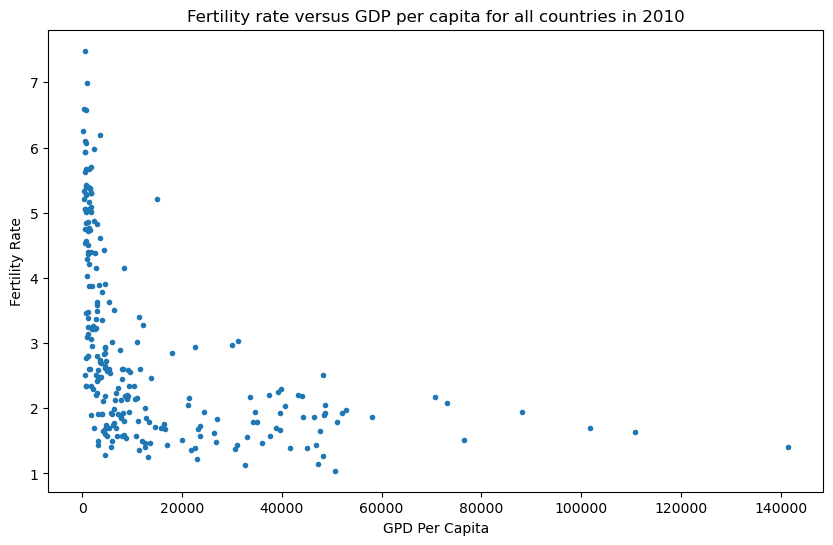

In [50]:
plt.figure(figsize = (10,6))
plt.title("Fertility rate versus GDP per capita for all countries in 2010")
plt.xlabel("GPD Per Capita")
plt.ylabel("Fertility Rate")
plt.scatter(gdp_data_filtered['2010'],fertility_rate_data_filtered['2010'], marker=".")
plt.show()